In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mod_my_utils.read_write_data import *

In [71]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'
period = 40
buy_threshold = 20
sell_threshold = 80

In [5]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [6]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Get RSI

In [11]:
def get_rsi(data, period = 14):
    """
    RSI indicator value calculation
    Input: 
    data frame with price of the stock
    period: moving window size for avg gain and avg loss calculation 
    Output: 
    Price and RSI values
    """
    rsi_data = pd.DataFrame(index = data.index)
    rsi_data['price'] = data['price']
    # change
    rsi_data['change'] = rsi_data['price'].diff(periods = 1)
    # gain
    rsi_data['gain'] = rsi_data['change']
    rsi_data.loc[rsi_data['gain'] < 0, ['gain']] = 0.0
    # loss
    rsi_data['loss'] = rsi_data['change']
    rsi_data.loc[rsi_data['loss'] > 0, ['loss']] = 0.0
    rsi_data['loss'] = abs(rsi_data['loss'])
    # average gain
    rsi_data['avg_gain'] = rsi_data['gain'].rolling(window = period).mean()
    # average loss
    rsi_data['avg_loss'] = rsi_data['loss'].rolling(window= period).mean()
    # rs
    rsi_data['rs'] = rsi_data['avg_gain'] / (rsi_data['avg_loss'] + 0.00005)
    # rsi
    rsi_data['rsi'] = 100 - 100 / (1 + rsi_data['rs'])
    return rsi_data[['price', 'rsi']]

In [70]:
rsi = get_rsi(data)

In [73]:
rsi = get_rsi(data, 14)
rsi.head(20)

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN
2007-12-10,24.958692,NaN
2007-12-11,24.230069,NaN
2007-12-12,24.528170,NaN
2007-12-13,24.652829,NaN


### Buy and sell signal

In [74]:
def get_rsi_signal(rsi, buy_threshold = 20, sell_threshold = 80):
    """
    RSI buy sell signal calculation
    Input:
    data: data frame with rsi indicator values
    buy_threshold: threshold for getting buy signal
    sell_threshold: threshold for getting sell signal
    Output: data frame with buy and sell signal
    """
    signals = pd.DataFrame(index=rsi.index)
    signals['price'] = rsi['price'] 
    signals['rsi'] = rsi['rsi']
    signals['buy']= 0.0
    signals['sell']= 0.0
    signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
    signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy']==-1.0,['buy']]=0 
    signals.loc[signals['sell']== 1.0,['sell']]=0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price','buy_sell']]

In [75]:
signals = get_rsi_signal(rsi, buy_threshold = buy_threshold, sell_threshold= sell_threshold)

In [35]:
rsi.head()

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN


<AxesSubplot:xlabel='Date'>

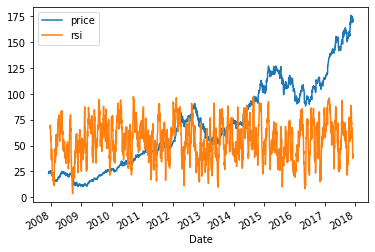

In [36]:
rsi.plot()

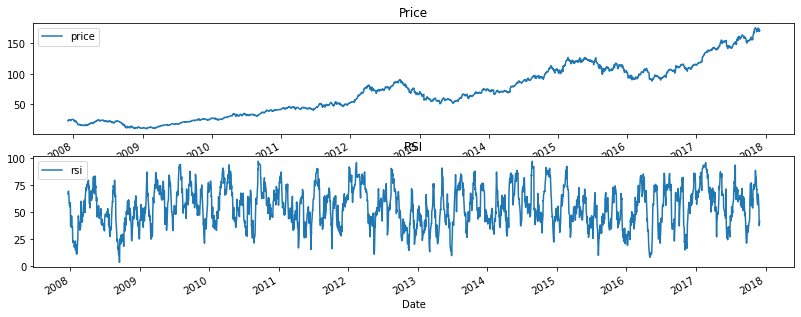

In [37]:
graph = plt.figure(figsize = (30, 5))
ax1 = graph.add_subplot(2, 2, 1)
rsi[['price']].plot(ax=ax1, title = 'Price')
ax2 = graph.add_subplot(2, 2, 3)
rsi[['rsi']].plot(ax=ax2, title = 'RSI')
plt.show()

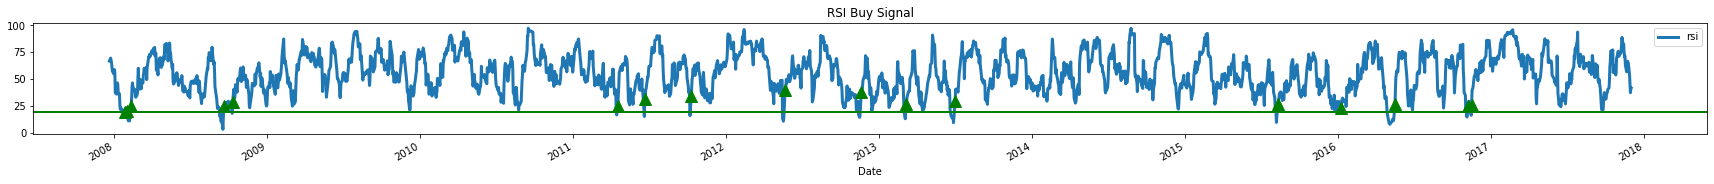

In [41]:
fig = plt.figure(figsize=(30, 5))
ax1 = fig.add_subplot(2, 1, 1)
rsi[['rsi']].plot(ax= ax1, title = 'RSI Buy Signal', lw=3.0)
ax1.axhline(y=20, color = "g", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
plt.show()

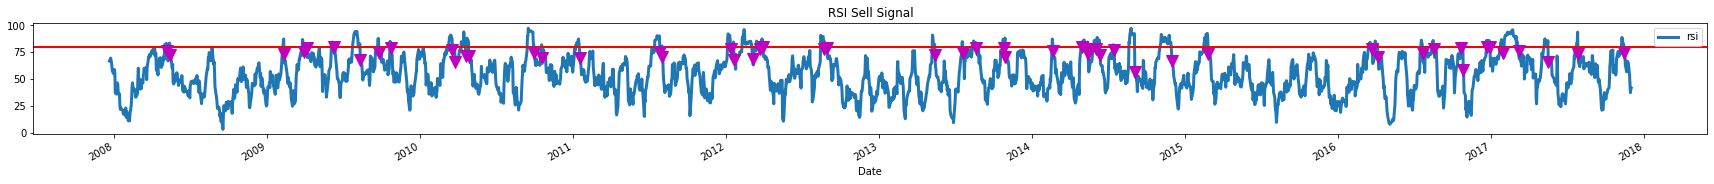

In [59]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(2, 1, 1)
rsi[['rsi']].plot(ax= ax1, title = 'RSI Sell Signal', lw= 3.0)
ax1.axhline(y=sell_threshold, color = "r", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
plt.show()

In [ ]:
# plotted buy and sell signals with rsi

In [ ]:
# how to plot buy and sell signals with price

In [45]:
rsi.head()

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN


In [47]:
signals.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0


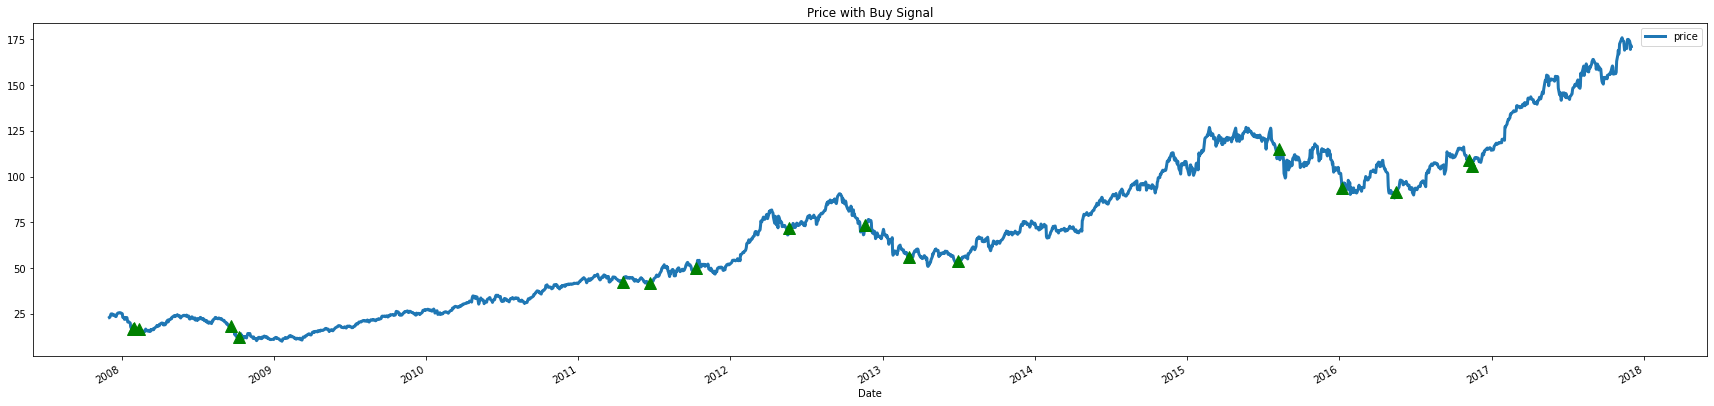

In [50]:
fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(2, 1, 1)
signals[['price']].plot(ax= ax1, title = 'Price with Buy Signal', lw=3.0)
# ax1.axhline(y=20, color = "g", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1],"^", markersize = 12, color ='g')
plt.show()

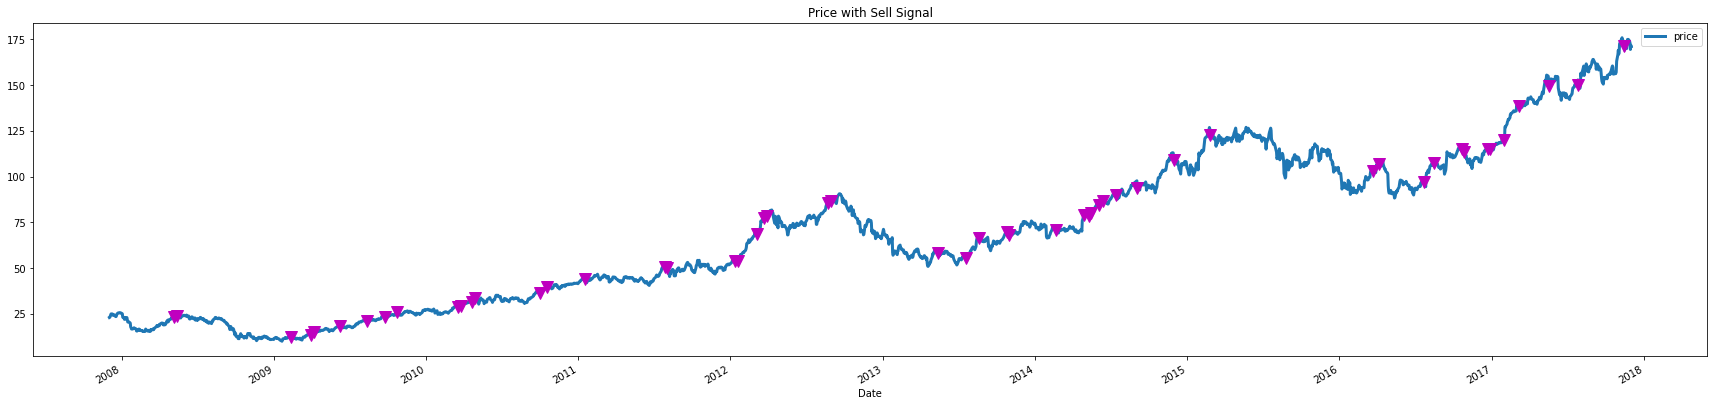

In [52]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(2, 1, 1)
signals[['price']].plot(ax= ax1, title = 'Price with Sell Signal', lw= 3.0)
# ax1.axhline(y=80, color = "r", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == -1].index, signals.price[signals.buy_sell == -1],"v", markersize = 12, color ='m')
plt.show()

### Plotting RSI value and Buy, Sell signal in one plot

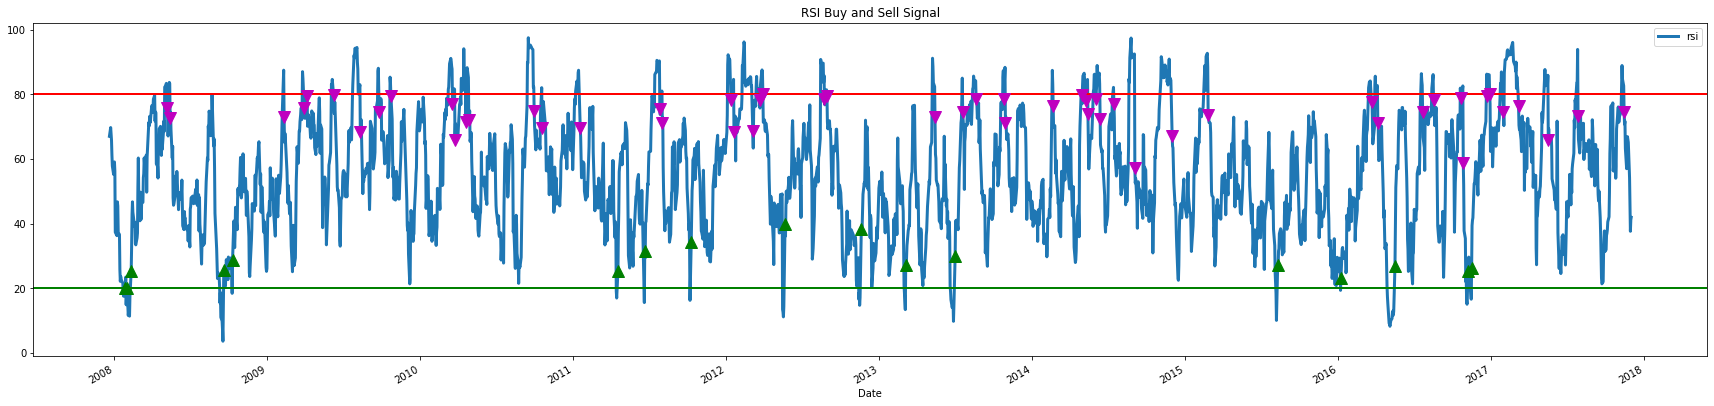

In [54]:
fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(2, 1, 1)
rsi[['rsi']].plot(ax= ax1, title = 'RSI Buy and Sell Signal', lw=3.0)
ax1.axhline(y=20, color = "g", lw=2.0)
ax1.axhline(y=80, color = "r", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
ax1.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
plt.show()

### Plotting Price and Buy Sell signals in one graph

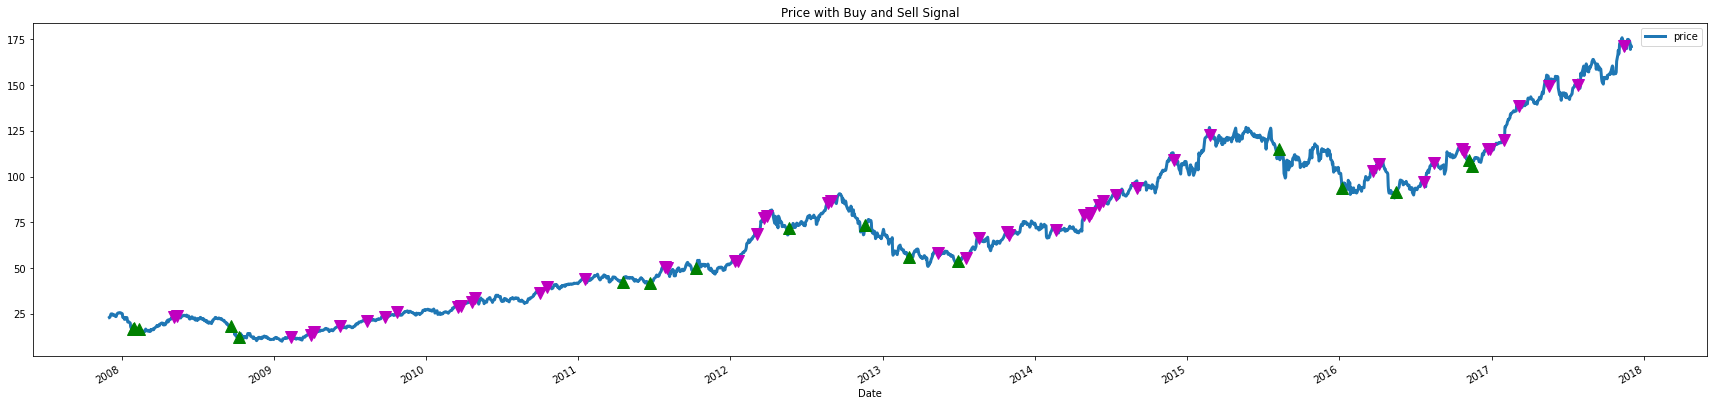

In [55]:
fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(2, 1, 1)
signals[['price']].plot(ax= ax1, title = 'Price with Buy and Sell Signal', lw=3.0)
# ax1.axhline(y=20, color = "g", lw=2.0)
ax1.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1],"^", markersize = 12, color ='g')
ax1.plot(signals.loc[signals.buy_sell == -1].index, signals.price[signals.buy_sell == -1],"v", markersize = 12, color ='m')
plt.show()

In [62]:
rsi.head()

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN


In [63]:
signals.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0


In [65]:
def plot_rsi_buy_sell(rsi, signals, buy_threshold = 20, sell_threshold = 80):
    
    """
    Plot rsi with buy and sell signal
    """
    graph = plt.figure(figsize=(20,5))
    ax1 = graph.add_subplot(1,1,1)
    rsi[['rsi']].plot(ax=ax1,title = 'RSI value and Buy, Sell signals')
    ax1.axhline(y= buy_threshold, color = "g", lw = 2.)
    ax1.axhline(y= sell_threshold, color = "r", lw = 2.)
    ax1.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax1.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    # plt.show()
    plt.show()

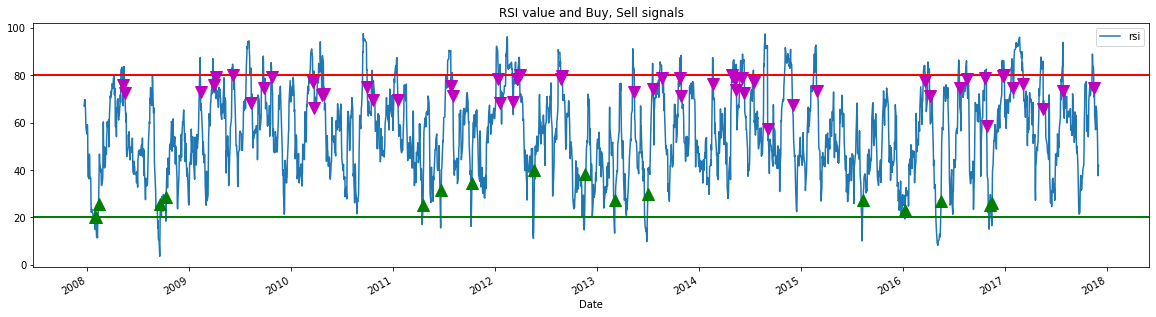

In [66]:
plot_rsi_buy_sell(rsi, signals, buy_threshold=buy_threshold, sell_threshold=sell_threshold)

In [68]:
def plot_rsi_price_buy_sell(signals):
    fig = plt.figure(figsize=(30, 15))
    ax1 = fig.add_subplot(2, 1, 1)
    signals[['price']].plot(ax= ax1, title = 'Price with Buy and Sell Signal', lw=3.0)
    # ax1.axhline(y=20, color = "g", lw=2.0)
    ax1.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax1.plot(signals.loc[signals.buy_sell == -1].index, signals.price[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    plt.show()

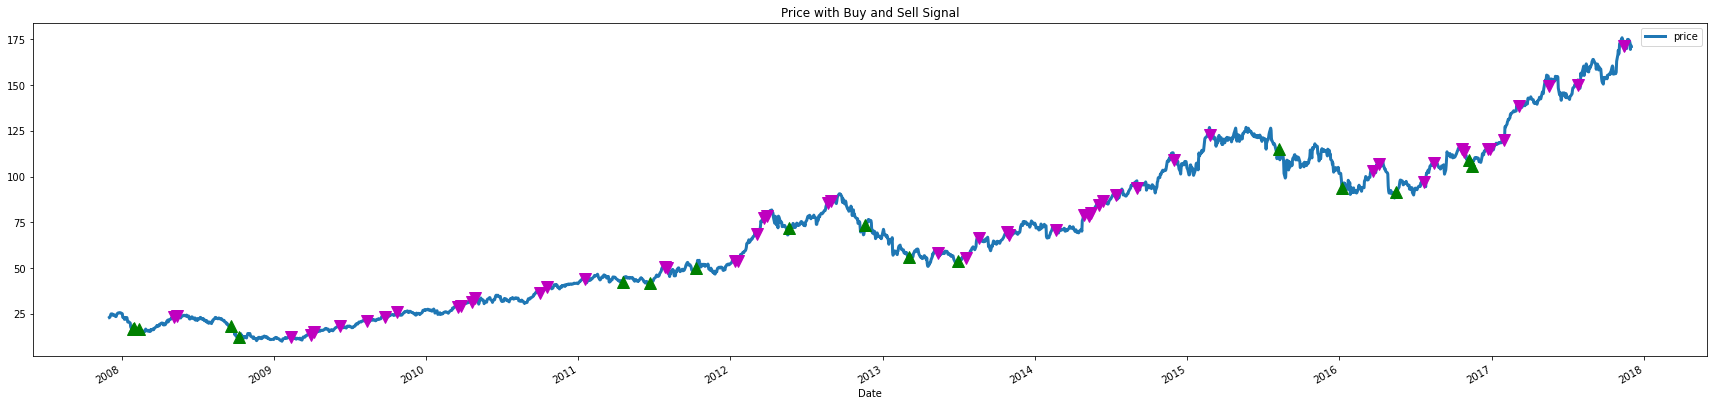

In [69]:
plot_rsi_price_buy_sell(signals)

In [ ]:
# what is the currect buy and sell threshold to choose


In [ ]:
buy_threshold = [20, 40, 25, 30]
sell_threshold = [80, 60, 75, 70]

In [ ]:
(25, 75) 